<a href="https://colab.research.google.com/github/vignesh7-byte/python-for-data-science/blob/main/lab_2_batch09_12_aug_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = {
    'Order ID': [101, 102, 103, 104, 105, 106, 107],
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Laptop', 'Mouse', 'Monitor'],
    'Quantity': [1, 5, 3, 2, 2, 10, 1],
    'Price': [75000, 500, 1500, 12000, 75000, 500, 12000]
}

df = pd.DataFrame(data)
print("Initial DataFrame:\n", df)

df['Total Sale'] = df['Quantity'] * df['Price']
print("\nDataFrame with Total Sale:\n", df)

high_sales = df[df['Total Sale'] > 1000]
print("\nOrders with Total Sale > 1000:\n", high_sales)

most_sold = df.groupby('Product')['Quantity'].sum().reset_index()
most_sold = most_sold.sort_values(by='Quantity', ascending=False)
print("\nMost Sold Products:\n", most_sold)

def discount_rule(sale):
    if sale > 50000:
        return sale * 0.10
    elif sale >= 10000:
        return sale * 0.05
    else:
        return 0

df['Discount'] = df['Total Sale'].apply(discount_rule)
print("\nDataFrame with Discount:\n", df)

summary = {
    'High Sales Orders': high_sales,
    'Most Sold Products': most_sold
}

with pd.ExcelWriter('sales_summary.xlsx') as writer:
    high_sales.to_excel(writer, sheet_name='High Sales', index=False)
    most_sold.to_excel(writer, sheet_name='Most Sold', index=False)
    df.to_excel(writer, sheet_name='Full Data', index=False)

print("\nExcel file 'sales_summary.xlsx' has been created.")

Initial DataFrame:
    Order ID   Product  Quantity  Price
0       101    Laptop         1  75000
1       102     Mouse         5    500
2       103  Keyboard         3   1500
3       104   Monitor         2  12000
4       105    Laptop         2  75000
5       106     Mouse        10    500
6       107   Monitor         1  12000

DataFrame with Total Sale:
    Order ID   Product  Quantity  Price  Total Sale
0       101    Laptop         1  75000       75000
1       102     Mouse         5    500        2500
2       103  Keyboard         3   1500        4500
3       104   Monitor         2  12000       24000
4       105    Laptop         2  75000      150000
5       106     Mouse        10    500        5000
6       107   Monitor         1  12000       12000

Orders with Total Sale > 1000:
    Order ID   Product  Quantity  Price  Total Sale
0       101    Laptop         1  75000       75000
1       102     Mouse         5    500        2500
2       103  Keyboard         3   1500       

Department Budget DataFrame:
    Department  Budget
0          HR   50000
1          IT  120000
2     Finance   90000
3   Marketing   75000
4  Operations  110000

Actual Expenses DataFrame:
    Department  Actual Expenses
0          HR            52000
1          IT           115000
2     Finance            95000
3   Marketing            80000
4  Operations           125000

Merged DataFrame:
    Department  Budget  Actual Expenses
0          HR   50000            52000
1          IT  120000           115000
2     Finance   90000            95000
3   Marketing   75000            80000
4  Operations  110000           125000

DataFrame with Variance:
    Department  Budget  Actual Expenses  Variance
0          HR   50000            52000      2000
1          IT  120000           115000     -5000
2     Finance   90000            95000      5000
3   Marketing   75000            80000      5000
4  Operations  110000           125000     15000

Departments exceeding budget:
    Department  B

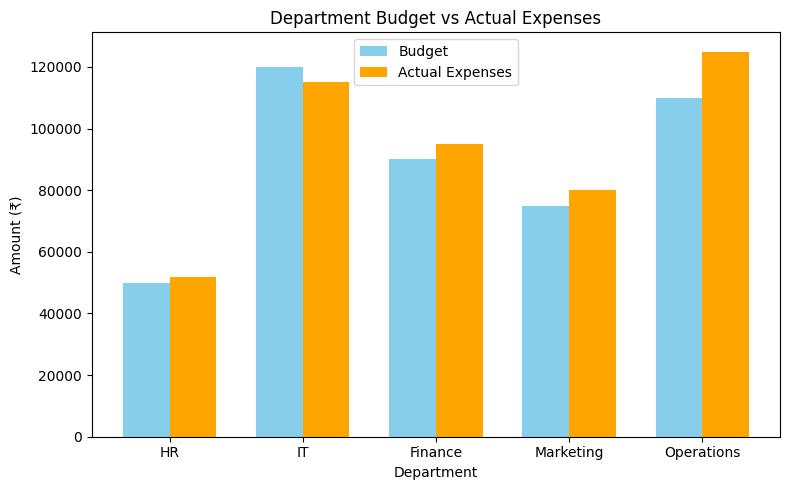

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

budget_data = {
    'Department': ['HR', 'IT', 'Finance', 'Marketing', 'Operations'],
    'Budget': [50000, 120000, 90000, 75000, 110000]
}

df_budget = pd.DataFrame(budget_data)
print("Department Budget DataFrame:\n", df_budget)

expenses_data = {
    'Department': ['HR', 'IT', 'Finance', 'Marketing', 'Operations'],
    'Actual Expenses': [52000, 115000, 95000, 80000, 125000]
}

df_expenses = pd.DataFrame(expenses_data)
print("\nActual Expenses DataFrame:\n", df_expenses)

merged_df = pd.merge(df_budget, df_expenses, on='Department')
print("\nMerged DataFrame:\n", merged_df)

merged_df['Variance'] = merged_df['Actual Expenses'] - merged_df['Budget']
print("\nDataFrame with Variance:\n", merged_df)

over_budget = merged_df[merged_df['Variance'] > 0]
print("\nDepartments exceeding budget:\n", over_budget)

sorted_df = merged_df.sort_values(by='Variance', ascending=False)
print("\nDepartments sorted by variance:\n", sorted_df)

plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(merged_df['Department']))

plt.bar(x, merged_df['Budget'], width=bar_width, label='Budget', color='skyblue')
plt.bar([p + bar_width for p in x], merged_df['Actual Expenses'], width=bar_width, label='Actual Expenses', color='orange')

plt.xlabel('Department')
plt.ylabel('Amount (₹)')
plt.title('Department Budget vs Actual Expenses')
plt.xticks([p + bar_width/2 for p in x], merged_df['Department'])
plt.legend()
plt.tight_layout()
plt.show()